# CDD - Lab2

EDA, Histogramas, Sumarização, Correlação

## Instruções

Individual, em dupla ou em grupos de 3 alunos.

Quando for feito por mais de um aluno:

*   Todos enviam uma cópia idêntica; OU
*   Um aluno envia uma cópia completa e os demais enviam uma cópia vazia, indicando apenas o grupo e onde está a solução (informe isso na próxima célula).

**Implementações Extras.**
Implemente apenas o que é pedido (a quantidade de gráficos, por exemplo). Caso queria implementar algo mais, deixe separado no final do notebook (existe uma seção de rascunho já criada para isso).





## Datset

Dados do Controle Acadêmico UFCG

### Descrição das Colunas

https://docs.google.com/document/d/1jLYjA8rZR3Yt9PRXGG0lFAHg74-spCZQ/edit?usp=drive_link

## Importações e complementos

In [ ]:
!pip install gdown

import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
import gdown

# bibliotecas para trabalhar offline com a biblioteca
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot
import cufflinks as cf # para conectar o plotly ao pandas
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)

import plotly.io as pio
pio.renderers

pio.renderers.default = 'colab'

## Carregar o dataset

In [ ]:
# ID do arquivo no Google Drive
file_id = '1-4b8IRYIAVhf8G-5qjNtrpNe-Mhi0NQD'

# URL para download do arquivo
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Baixar o arquivo usando gdown
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

# Carregar o dataset no pandas
df = pd.read_csv(output)

# Exibir as primeiras linhas do dataframe
df.head()

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1-4b8IRYIAVhf8G-5qjNtrpNe-Mhi0NQD
From (redirected): https://drive.google.com/uc?export=download&id=1-4b8IRYIAVhf8G-5qjNtrpNe-Mhi0NQD&confirm=t&uuid=9c02543d-e824-4844-be3e-0bbf966a2ab8
To: /content/dataset.csv
100%|██████████| 239M/239M [00:03<00:00, 70.4MB/s]


,registration,subjectCode,classYear,classPeriod,classId,status_x,type,finalAverage,courseCode,curriculumCode,...,inactivityPeriod,admissionType,admissionYear,admissionPeriod,nationality,countryOfBirth,race,secondarySchoolGraduationYear,secondarySchoolType,affirmativePolicy
0,119135939,1307196,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,...,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
1,119135939,1307351,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,...,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
2,119135939,1307352,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,...,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
3,119135939,1307353,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,...,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
4,119135939,1307369,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,...,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1


### Amostra do data frame para realizar as atividades

In [ ]:
unique_observations = df.drop_duplicates(subset='registration', keep='last')
data = unique_observations[(df.courseCode == 14102100.0) & (df.curriculumCode == 2017.0)]
data

<ipython-input-4-5a4ae6c1786a>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,registration,subjectCode,classYear,classPeriod,classId,status_x,type,finalAverage,courseCode,curriculumCode,...,inactivityPeriod,admissionType,admissionYear,admissionPeriod,nationality,countryOfBirth,race,secondarySchoolGraduationYear,secondarySchoolType,affirmativePolicy
640799,118114055,1411357,2021,2,1.0,APROVADO,NORMAL,9.0,14102100.0,2017.0,...,1.0,SISU,2018.0,1.0,BRASILEIRA,PB,BRANCA,2017.0,SOMENTE_ESCOLA_PRIVADA,NaN
640823,116119801,1411311,2018,1,2.0,REPROVADO,NORMAL,4.0,14102100.0,2017.0,...,2.0,SISU,2016.0,1.0,BRASILEIRA,PB,PARDA,2011.0,SOMENTE_ESCOLA_PUBLICA,L2
640884,116214098,1411349,2018,2,1.0,APROVADO,NORMAL,9.2,14102100.0,2017.0,...,1.0,TRANSFERENCIA,2016.0,2.0,BRASILEIRA,PB,PARDA,2015.0,NaN,NaN
640915,116218962,1411345,2018,1,NaN,APROVADO,DISPENSA,7.0,14102100.0,2017.0,...,2.0,TRANSFERENCIA,2016.0,2.0,BRASILEIRA,SP,PRETA,2014.0,SOMENTE_ESCOLA_PRIVADA,NaN
640983,116113592,1411360,2021,1,1.0,APROVADO,NORMAL,9.2,14102100.0,2017.0,...,1.0,SISU,2016.0,1.0,BRASILEIRA,MA,PARDA,2011.0,SOMENTE_ESCOLA_PUBLICA,L6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677385,116113859,1411358,2020,0,1.0,APROVADO,NORMAL,9.9,14102100.0,2017.0,...,1.0,SISU,2016.0,1.0,BRASILEIRA,PB,PARDA,2015.0,SOMENTE_ESCOLA_PRIVADA,NaN
677447,116114837,1411358,2020,0,1.0,APROVADO,NORMAL,9.8,14102100.0,2017.0,...,1.0,SISU,2016.0,1.0,BRASILEIRA,PB,PARDA,2015.0,SOMENTE_ESCOLA_PUBLICA,L6
677517,116118501,1411361,2021,1,1.0,APROVADO,NORMAL,10.0,14102100.0,2017.0,...,2.0,SISU,2016.0,1.0,BRASILEIRA,PB,PARDA,2015.0,SOMENTE_ESCOLA_PRIVADA,NaN
677579,116116525,1411358,2020,0,1.0,APROVADO,NORMAL,9.7,14102100.0,2017.0,...,1.0,SISU,2016.0,1.0,BRASILEIRA,PB,BRANCA,2015.0,SOMENTE_ESCOLA_PRIVADA,NaN


## Inspeção Inicial dos Dados, Pré-processamento, limpeza, transformações, etc

Fique à vontade para criar descrições aninhadas aqui. Para ficarem aninhados, use títulos markdown de 3o nível (###) em diante.

### Inspeção Inicial

In [ ]:
df.shape

(1189255, 27)

In [ ]:
df.describe()

,registration,subjectCode,classYear,classPeriod,classId,finalAverage,courseCode,curriculumCode,campus,birthDate,inactivityYear,inactivityPeriod,admissionYear,admissionPeriod,secondarySchoolGraduationYear
count,1.189255e+06,1.189255e+06,1.189255e+06,1.189255e+06,1.019113e+06,1.054098e+06,1.189255e+06,1.189255e+06,1.189255e+06,1.189255e+06,1.189255e+06,1.189255e+06,1.189255e+06,1.189255e+06,1.188555e+06
mean,3.150337e+08,3.170555e+06,2.017257e+03,1.413391e+00,1.616227e+00,7.606633e+00,3.207199e+07,2.009358e+03,2.990878e+00,2.973991e+01,2.019479e+03,1.488727e+00,2.015794e+03,1.330969e+00,2.012041e+03
std,2.459717e+08,2.398727e+06,2.328320e+00,5.483675e-01,1.442171e+00,1.993974e+00,2.386134e+07,5.924388e+00,2.458868e+00,5.169507e+00,2.408825e+00,4.998731e-01,1.902938e+00,4.705620e-01,4.458422e+00
min,1.111150e+08,1.105005e+06,2.007000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.110412e+07,1.986000e+03,1.000000e+00,2.100000e+01,2.013000e+03,1.000000e+00,2.013000e+03,1.000000e+00,1.974000e+03
25%,1.161227e+08,1.304214e+06,2.016000e+03,1.000000e+00,1.000000e+00,7.000000e+00,1.331425e+07,2.008000e+03,1.000000e+00,2.600000e+01,2.018000e+03,1.000000e+00,2.014000e+03,1.000000e+00,2.010000e+03
50%,2.151368e+08,2.103227e+06,2.017000e+03,1.000000e+00,1.000000e+00,8.000000e+00,2.120510e+07,2.009000e+03,2.000000e+00,2.900000e+01,2.020000e+03,1.000000e+00,2.016000e+03,1.000000e+00,2.013000e+03
75%,5.131264e+08,5.101052e+06,2.019000e+03,2.000000e+00,2.000000e+00,9.000000e+00,5.110711e+07,2.014000e+03,5.000000e+00,3.100000e+01,2.021000e+03,2.000000e+00,2.017000e+03,2.000000e+00,2.015000e+03
max,9.192499e+08,9.101505e+06,2.103000e+03,2.000000e+00,9.900000e+01,1.000000e+01,9.140210e+07,2.024000e+03,9.000000e+00,8.300000e+01,2.024000e+03,2.000000e+00,2.019000e+03,2.000000e+00,2.019000e+03


In [ ]:
df.dtypes

,0
registration,int64
subjectCode,int64
classYear,int64
classPeriod,int64
classId,float64
status_x,object
type,object
finalAverage,float64
courseCode,float64
curriculumCode,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189255 entries, 0 to 1189254
Data columns (total 27 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   registration                   1189255 non-null  int64  
 1   subjectCode                    1189255 non-null  int64  
 2   classYear                      1189255 non-null  int64  
 3   classPeriod                    1189255 non-null  int64  
 4   classId                        1019113 non-null  float64
 5   status_x                       1189255 non-null  object 
 6   type                           1189255 non-null  object 
 7   finalAverage                   1054098 non-null  float64
 8   courseCode                     1189255 non-null  float64
 9   curriculumCode                 1189255 non-null  float64
 10  campus                         1189255 non-null  float64
 11  maritalStatus                  1189255 non-null  object 
 12  gender        

### Pré-Processamento da amostra

In [ ]:
def compute_qt_periods(row):
  years = row['inactivityYear'] - row['admissionYear']
  years = years * 2 if years != 0 else 0
  result = years + 1 if row['admissionPeriod'] != row['inactivityPeriod'] else years
  return result if result != 0 else 1

def compute_current_age(row):
  diff = 2024 - row['admissionYear']
  return row['birthDate'] - diff

data["age"] = data.apply(lambda row: compute_current_age(row), axis=1)
data["qtPeriods"] = data.apply(lambda row: compute_qt_periods(row), axis=1)

data['finalAverage'].fillna(0, inplace=True)
data['genderNumeric'] = data['gender'].apply(lambda x: 1 if x == 'MASCULINO' else 0)

data

,registration,subjectCode,classYear,classPeriod,classId,status_x,type,finalAverage,courseCode,curriculumCode,...,admissionPeriod,nationality,countryOfBirth,race,secondarySchoolGraduationYear,secondarySchoolType,affirmativePolicy,age,qtPeriods,genderNumeric
640799,118114055,1411357,2021,2,1.0,APROVADO,NORMAL,9.0,14102100.0,2017.0,...,1.0,BRASILEIRA,PB,BRANCA,2017.0,SOMENTE_ESCOLA_PRIVADA,NaN,18.0,8.0,1
640823,116119801,1411311,2018,1,2.0,REPROVADO,NORMAL,4.0,14102100.0,2017.0,...,1.0,BRASILEIRA,PB,PARDA,2011.0,SOMENTE_ESCOLA_PUBLICA,L2,21.0,5.0,1
640884,116214098,1411349,2018,2,1.0,APROVADO,NORMAL,9.2,14102100.0,2017.0,...,2.0,BRASILEIRA,PB,PARDA,2015.0,NaN,NaN,20.0,9.0,1
640915,116218962,1411345,2018,1,NaN,APROVADO,DISPENSA,7.0,14102100.0,2017.0,...,2.0,BRASILEIRA,SP,PRETA,2014.0,SOMENTE_ESCOLA_PRIVADA,NaN,19.0,6.0,1
640983,116113592,1411360,2021,1,1.0,APROVADO,NORMAL,9.2,14102100.0,2017.0,...,1.0,BRASILEIRA,MA,PARDA,2011.0,SOMENTE_ESCOLA_PUBLICA,L6,23.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677385,116113859,1411358,2020,0,1.0,APROVADO,NORMAL,9.9,14102100.0,2017.0,...,1.0,BRASILEIRA,PB,PARDA,2015.0,SOMENTE_ESCOLA_PRIVADA,NaN,18.0,8.0,1
677447,116114837,1411358,2020,0,1.0,APROVADO,NORMAL,9.8,14102100.0,2017.0,...,1.0,BRASILEIRA,PB,PARDA,2015.0,SOMENTE_ESCOLA_PUBLICA,L6,18.0,8.0,1
677517,116118501,1411361,2021,1,1.0,APROVADO,NORMAL,10.0,14102100.0,2017.0,...,1.0,BRASILEIRA,PB,PARDA,2015.0,SOMENTE_ESCOLA_PRIVADA,NaN,18.0,11.0,1
677579,116116525,1411358,2020,0,1.0,APROVADO,NORMAL,9.7,14102100.0,2017.0,...,1.0,BRASILEIRA,PB,BRANCA,2015.0,SOMENTE_ESCOLA_PRIVADA,NaN,18.0,8.0,1


## Histogramas

**As análises daqui por diante podem ser do datset inteiro ou de um recorte deles (e.g, análise para uma determinada região, gênero, etc).**

Plote 2 a 5 histogramas que julgar interessantes. Uma boa escolha pode ser para situações onde a distribuição observada não está bem alinhada com o que você imaginou inicialmente. Nas células markdown que antedecem os gráficos, comente brevemente o que foi plotado/observado.



### Histograma 1:
- Determinar a idade média dos alunos quando saem da universidade, seja por término do curso, evasão ou outros motivos. Isso pode ajudar a identificar se os alunos estão demorando mais ou menos tempo do que o esperado para concluir seus estudos.

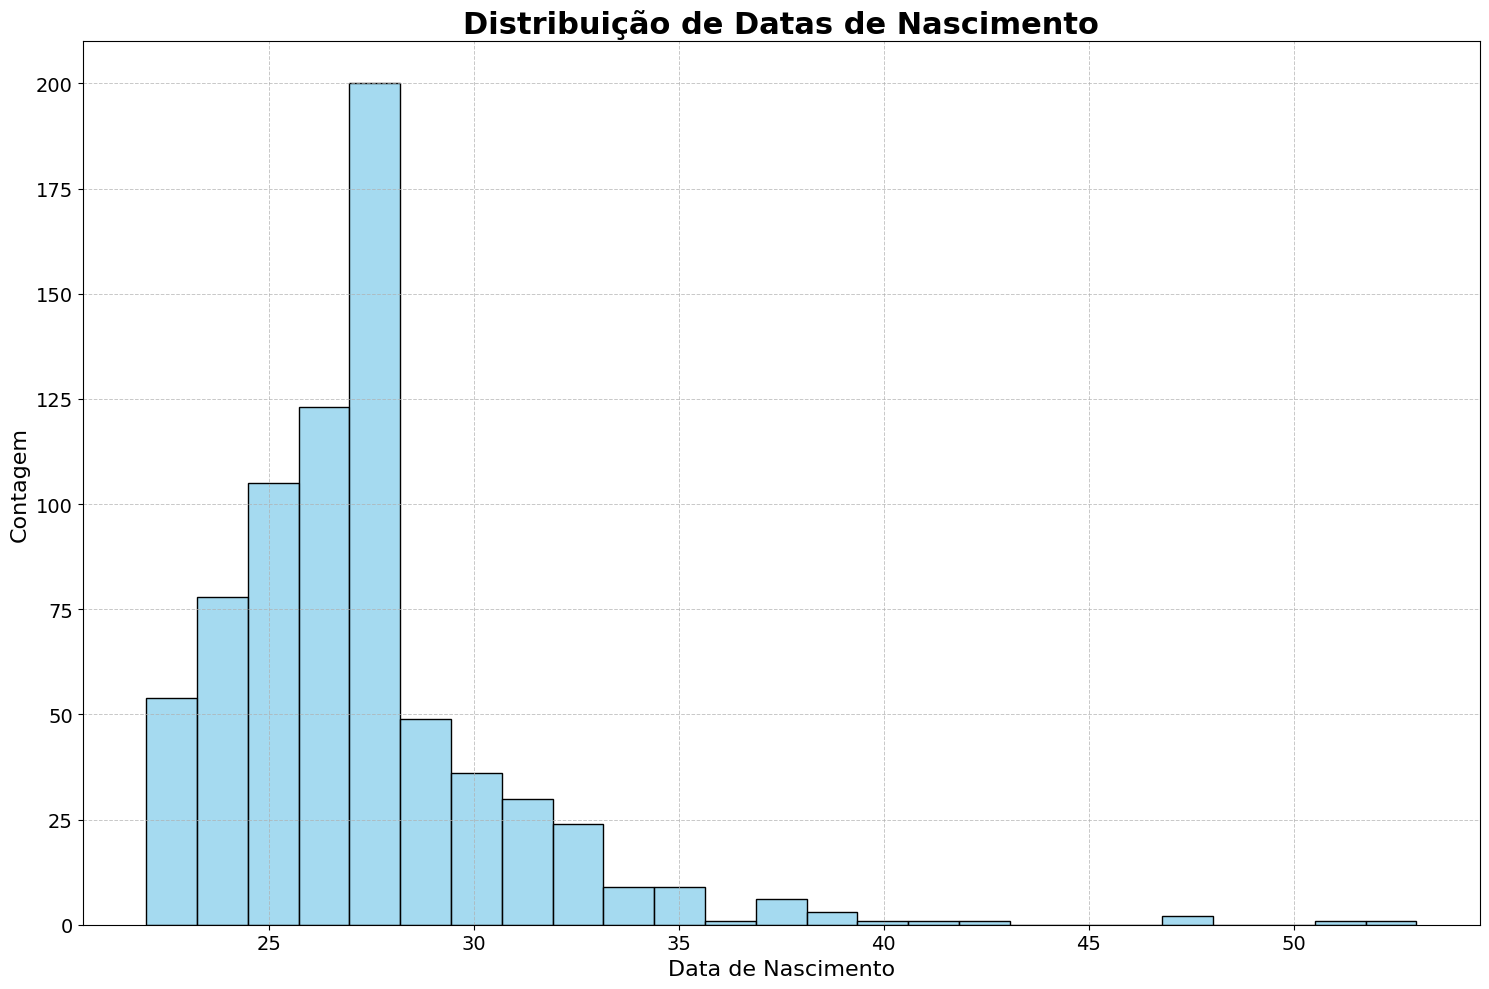

In [ ]:
# Ajustando o número de bins para melhor visualização
nbins = len(data['birthDate'].unique())

# Criando a figura e o eixo
plt.figure(figsize=(15, 10))

# Plotando o histograma com ajustes estéticos
sns.histplot(data['birthDate'], bins=nbins, color='skyblue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Distribuição de Datas de Nascimento', fontsize=22, fontweight='bold')
plt.xlabel('Data de Nascimento', fontsize=16)
plt.ylabel('Contagem', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7, linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

### Histograma 2:
- Hipótese: Pode haver uma diferença nas notas finais médias entre gêneros. Alunos de diferentes gêneros podem ter distribuições de notas finais diferentes.

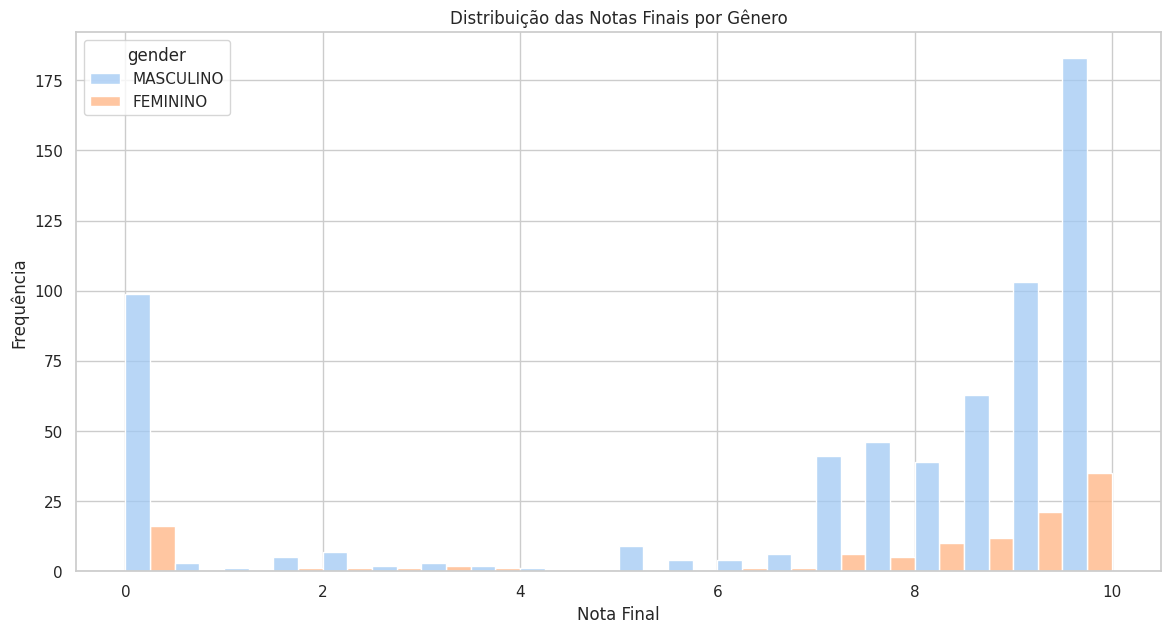

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))


sns.histplot(data=data, x='finalAverage', hue='gender', multiple='dodge', palette='pastel', bins=20)

plt.title('Distribuição das Notas Finais por Gênero')
plt.xlabel('Nota Final')
plt.ylabel('Frequência')
plt.show()


### Histograma 3:
- A hipótese é que pode haver diferenças significativas nas taxas de aproveitamento entre gêneros. Por exemplo, pode-se investigar se um gênero tem maior taxa de aprovação ou reprovação em comparação com o outro.

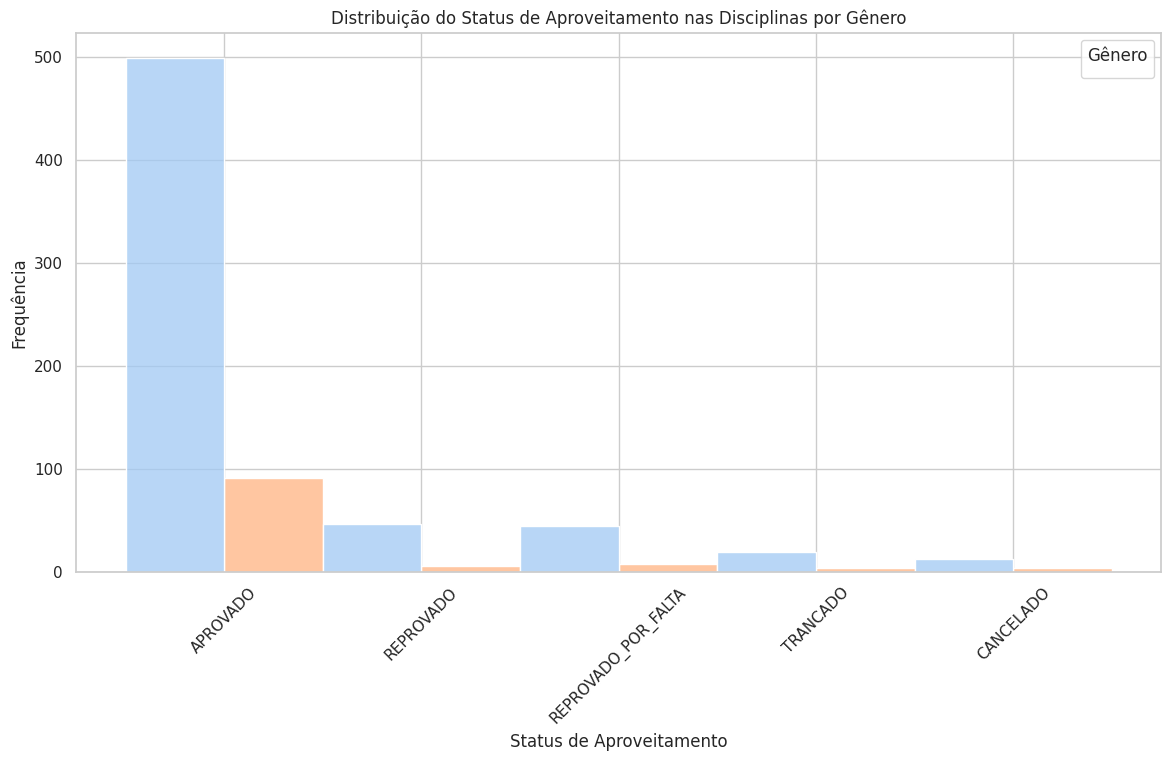

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(14, 7))


sns.histplot(data=data, x='status_x', hue='gender', multiple='dodge', discrete=True, palette='pastel')


plt.title('Distribuição do Status de Aproveitamento nas Disciplinas por Gênero')
plt.xlabel('Status de Aproveitamento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.show()

## Gráficos de dispersão, boxplots, violinplots

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Plote 2 a 5 gráficos que julgar interessantes.

Procure fazer comparações (colocar 2 ou mais boxplot lado a lado, por exemplo).

Procure usar algumas visualizações um pouco diferentes daquelas vistas em sala. Por exemplo. gráficos que misturam pontos com boxplot ou violinplots. Algumas sugestões estão em um capítulo de livro postado no classroom (do livro Fundamentals of Data Visualization, de Claus O. Wilke).

Procure identificar situações pouco esperadas / menos óbvias, pois, se conseguir, isso será um grande diferencial.

Deixe comentários em markdown nas células que entecedem os gráficos.



### Plotagem 1:
- O gráfico apresentado abaixo tem como objetivo identificar possíveis padrões ou correlações entre a idade dos estudantes no ingresso e o total de períodos cursados. Observando os pontos no gráfico, é possível analisar se estudantes que ingressaram mais jovens tendem a cursar mais períodos ou se há alguma tendência diferente para aqueles que ingressaram em idades mais avançadas.
- Exibe a relação entre a idade de ingresso na universidade e a quantidade total de períodos cursados pelos estudantes.

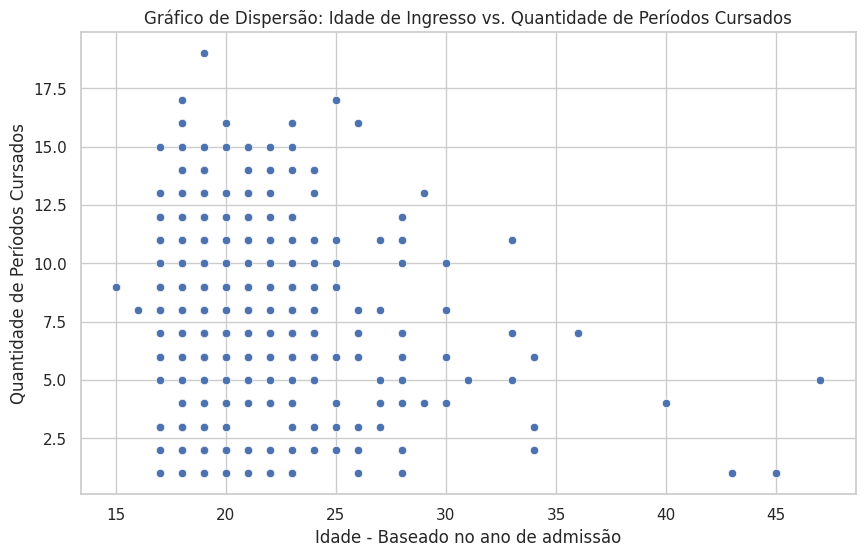

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='qtPeriods')
plt.title('Gráfico de Dispersão: Idade de Ingresso vs. Quantidade de Períodos Cursados')
plt.xlabel('Idade - Baseado no ano de admissão')
plt.ylabel('Quantidade de Períodos Cursados')
plt.show()


### Plotagem 2:
- O boxplot apresentado  abaixo tem como objetivo mostrar a variação na quantidade de períodos cursados em relação às diferentes faixas etárias de ingresso. Ele permite visualizar a dispersão dos dados e identificar possíveis tendências ou diferenças entre as faixas etárias.
- Assim, ilustra a distribuição da quantidade de períodos cursados pelos estudantes, agrupada por faixas etárias de ingresso na universidade.

<ipython-input-14-2131665db64b>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




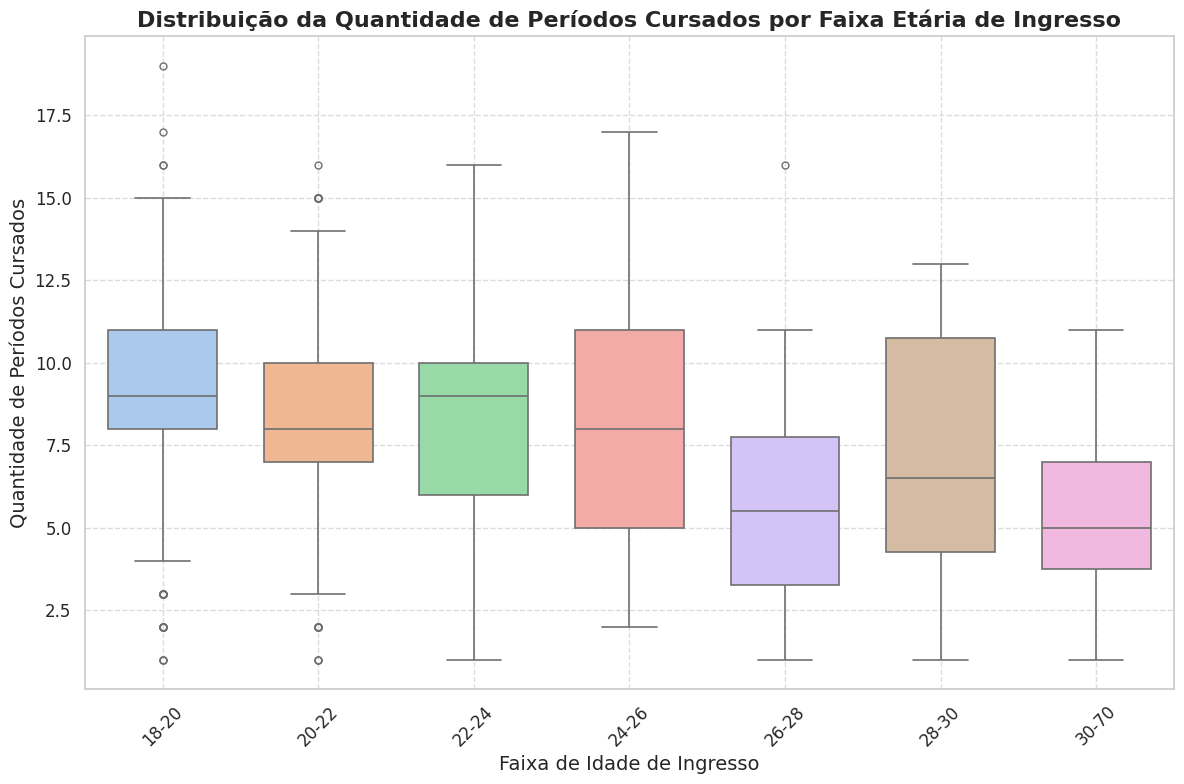

In [ ]:
# Criar faixas de idade
bins = [18, 20, 22, 24, 26, 28, 30, 70]
labels = ['18-20', '20-22', '22-24', '24-26', '26-28', '28-30', '30-70']
data['faixa_age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Configuração do gráfico
plt.figure(figsize=(12, 8))

# Criar o boxplot
sns.boxplot(x='faixa_age', y='qtPeriods', data=data, palette='pastel', width=0.7, fliersize=5, linewidth=1.2)

# Personalizar o gráfico
plt.title('Distribuição da Quantidade de Períodos Cursados por Faixa Etária de Ingresso', fontsize=16, weight='bold')
plt.xlabel('Faixa de Idade de Ingresso', fontsize=14)
plt.ylabel('Quantidade de Períodos Cursados', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Plotagem 3:
- O violinplot apresentado abaixo mostra a distribuição da quantidade de períodos cursados pelos estudantes, agrupada por faixas etárias de ingresso na universidade.
- O violinplot permite observar não apenas a mediana e a variabilidade, mas também a forma da distribuição dos dados.

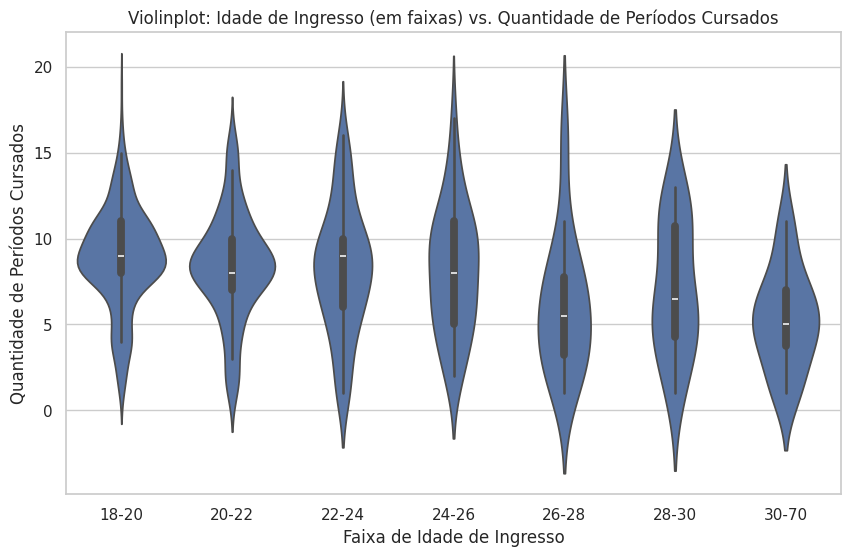

In [ ]:
# Violinplot com faixas de idade
plt.figure(figsize=(10, 6))
sns.violinplot(x='faixa_age', y='qtPeriods', data=data)
plt.title('Violinplot: Idade de Ingresso (em faixas) vs. Quantidade de Períodos Cursados')
plt.xlabel('Faixa de Idade de Ingresso')
plt.ylabel('Quantidade de Períodos Cursados')
plt.show()

### Plotagem 4:
- Os gráficos de dispersão apresentados abaixo ilustram a contagem de estudantes com diferentes status acadêmicos, agrupados por gênero. Cada gráfico mostra a relação entre o status acadêmico dos estudantes e o número de estudantes que possuem esse status, dividido por gênero.

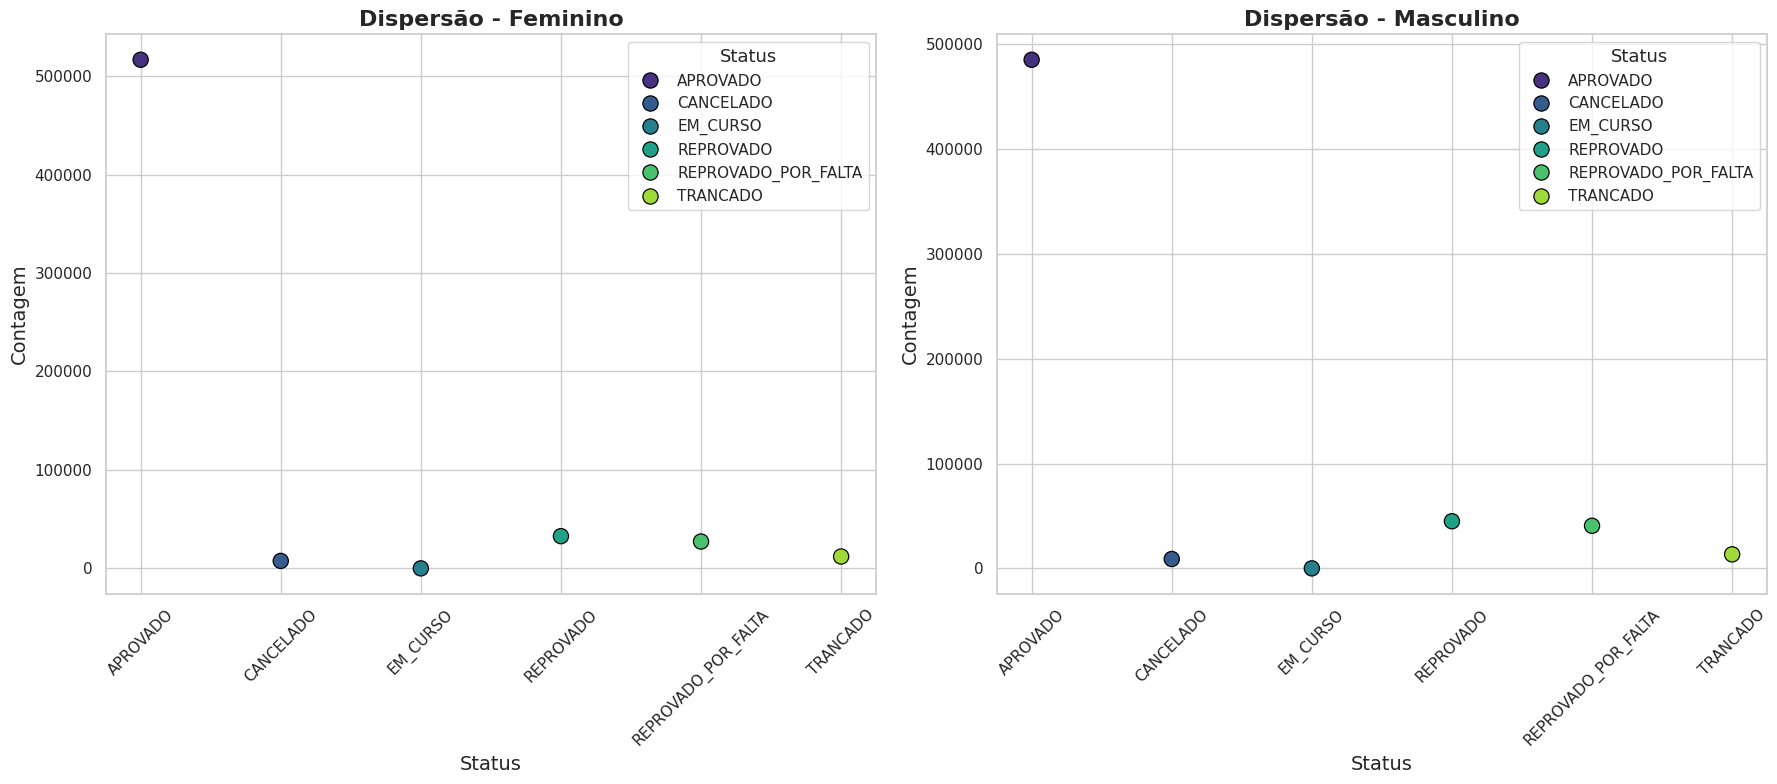

In [ ]:
status_unicos = df['status_x'].unique()

# Filtrar os dados para os status específicos
df_filtrado = df[df['status_x'].isin(status_unicos)]

# Contagem de cada status por gênero
status_counts = df_filtrado.groupby(['gender', 'status_x']).size().reset_index(name='count')
df_feminino = status_counts[status_counts['gender'] == 'FEMININO']
df_masculino = status_counts[status_counts['gender'] == 'MASCULINO']

plt.figure(figsize=(18, 8))

# Gráfico de dispersão para o gênero feminino
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_feminino, x='status_x', y='count', hue='status_x', palette='viridis', s=120, edgecolor='black', marker='o')
plt.title('Dispersão - Feminino', fontsize=16, weight='bold')
plt.xlabel('Status', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Status', title_fontsize='13', fontsize='11')

# Gráfico de dispersão para o gênero masculino
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_masculino, x='status_x', y='count', hue='status_x', palette='viridis', s=120, edgecolor='black', marker='o')
plt.title('Dispersão - Masculino', fontsize=16, weight='bold')
plt.xlabel('Status', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Status', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()

## Correlações

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Procure por correlações nos dados e mostre os valores encontrados. Fique à vontade para plotar gráficos antes de calcular a correlação, caso ache útil.

Justifique a estratégia utilizada para calcular.

Basta mostrar de 2 a 5 situações investigadas.

Lembre-se de comentar seus achados. Por exemplo:

*   Se a correlação encontrada foi relevante (se não é muito óbvia).
*   Ou se você esperaria ver uma correlação entre duas variáveis mas os dados não confirmaram. Ou seja, alguns dos itens que você vai adicionar ao notebook pode não ser uma correlação que encontrou, mas sim a confirmação de uma ausência de correlação.


Deixe comentários em markdown nas células que entecedem os códigos / gráficos.



### Correlação entre períodos cursados e a idade

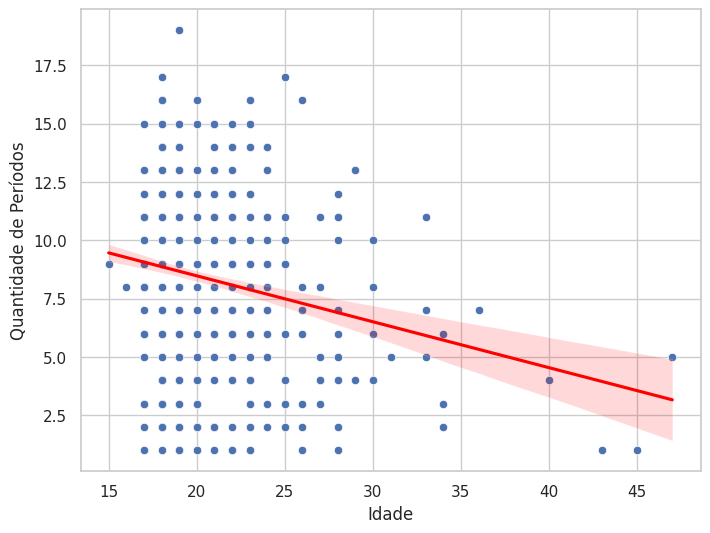

Correlação linear (Pearson) entre Quantidades de Períodos cursados e Idade: -0.20934893643646524
Correlação não linear (Spearman) entre Quantidades de Períodos cursados e Idade:                 age  qtPeriods
age        1.000000  -0.166226
qtPeriods -0.166226   1.000000


In [ ]:
correlation = scipy.stats.pearsonr(data.qtPeriods, data.age)
non_linear_correlation = data[['age','qtPeriods']].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='qtPeriods', data=data)

# Adicionar a linha de tendência
sns.regplot(x='age', y='qtPeriods', data=data, scatter=False, color='red')

# Adicionar títulos e rótulos
plt.xlabel('Idade')
plt.ylabel('Quantidade de Períodos')

# Mostrar o gráfico
plt.show()

print(f"Correlação linear (Pearson) entre Quantidades de Períodos cursados e Idade: {correlation.correlation}")
print(f"Correlação não linear (Spearman) entre Quantidades de Períodos cursados e Idade: {non_linear_correlation}")

Um valor de -0.20934893643646524 de correlação usando o método de Pearson indica uma correlação negativa fraca entre a quantidade de períodos cursados e a idade. Isso significa que, em média, conforme a idade aumenta, a quantidade de períodos cursados tende a diminuir ligeiramente. Porém, essa correlação é fraca, sugerindo que a relação linear entre essas duas variáveis não é muito forte, mas apenas verificamos a existência de uma relação linear, usando o método de Spearman podemos verificar relacionamentos não-lineares.

O valor de -0.166226 na correlação de Spearman entre a idade e a quantidade de períodos cursados indica uma correlação negativa fraca, semelhante ao coeficiente de Pearson. Isso sugere que, em média, conforme a idade aumenta, a quantidade de períodos cursados tende a diminuir um pouco, mas essa relação não é muito forte e pode não ser linear.

Ambos os coeficientes de correlação (Pearson e Spearman) indicam uma relação negativa fraca entre a idade e a quantidade de períodos cursados. Isso significa que, em média, conforme a idade das pessoas aumenta, a quantidade de períodos cursados tende a diminuir ligeiramente. No entanto, essa correlação é fraca, sugerindo que outros fatores podem estar influenciando a relação entre essas variáveis.

In [ ]:
# Calcular a correlação de Pearson
correlation, p_value = scipy.stats.pearsonr(data['genderNumeric'], data['finalAverage'])
non_linear_correlation = data[['genderNumeric','finalAverage']].corr(method='spearman')
print(f'Correlação de Pearson: {correlation}, p-valor: {p_value}')
print(f"Correlação não linear (Spearman) entre Quantidades de Períodos cursados e Idade: {non_linear_correlation}")

Correlação de Pearson: -0.0216998997873286, p-valor: 0.5572236911475997
Correlação não linear (Spearman) entre Quantidades de Períodos cursados e Idade:                genderNumeric  finalAverage
genderNumeric       1.000000     -0.028378
finalAverage       -0.028378      1.000000


Um valor de -0.0216998997873286 de correlação usando o método de Pearson indica uma correlação negativa fraca entre o gênero e o aproveitamento na disciplina. Isso significa que não há muita diferença no aproveitamento de disciplinas entre diferentes gêneros.

O valor de -0.028378 na correlação de Spearman, semelhante ao coeficiente de Pearson. Isso sugere que também não há algum tipo de correlação que não seja linar, ou se existir é muito fraca.

Ambos os coeficientes de correlação (Pearson e Spearman) indicam uma relação negativa fraca entre o gênero e o aproveitamento das disciplinas. Isso significa que não há diferença ou muita diferença no aproveitamento da disciplinas entre diferentes gêneros.

# Implementações EXTRAS / RASCUNHO

Caso tenha implementado mais coisas do que foi pedido, coloque-as a partir deste ponto, para deixar a parte anterior mais limpa.

Fique totalmente à vontade para colocar qualquer coisa aqui, com ou sem comentários. É como o rascunho de uma prova... não será corrigido.

In [ ]:
#

# Análise Profunda dos Dados
A hipótese examinada a seguir observa se os alunos que ingressaram por meio de políticas afirmativas têm desempenho acadêmico diferente ao longo do tempo, comparando anos de ingresso distintos. Essa análise pode destacar mudanças na eficácia das políticas afirmativas(cotas, raça) e seu impacto no desempenho acadêmico.


Descrição das cotas:
  - L1: Renda < 1.5 salário e Ensino Médio em escolas públicas.
  - L2: Candidatos autodeclarados pretos, pardos, quilombolas ou indígenas, com renda familiar bruta per capita igual ou inferior a um salário mínimo e que tenham cursado integralmente o ensino médio em escola pública.
  - L6: Candidatos autodeclarados pretos, pardos, quilombolas ou indígenas que, independente da renda, tenham cursado integralmente o ensino médio em escolas públicas.
  - L5: Candidatos que, independente da renda, tenham cursado integralmente o ensino médio em escolas públicas.
  - L13: Candidatos com deficiência que, independente da renda, tenham cursado integralmente o ensino médio em escolas públicas.
  - L14: Candidatos com deficiência autodeclarados pretos, pardos, quilombolas ou indígenas que, independente da renda, tenham cursado integralmente o ensino médio em escolas públicas.
  - L10: Candidatos com deficiência autodeclarados pretos, pardos, quilombolas ou indígenas, com renda familiar bruta per capita igual ou inferior a um salário mínimo e que tenham cursado integralmente o ensino médio em escola pública.
  - L9: Candidatos com deficiência que tenham renda familiar bruta per capita igual ou inferior a um salário mínimo, que tenham cursado integralmente o ensino médio em escolas públicas.

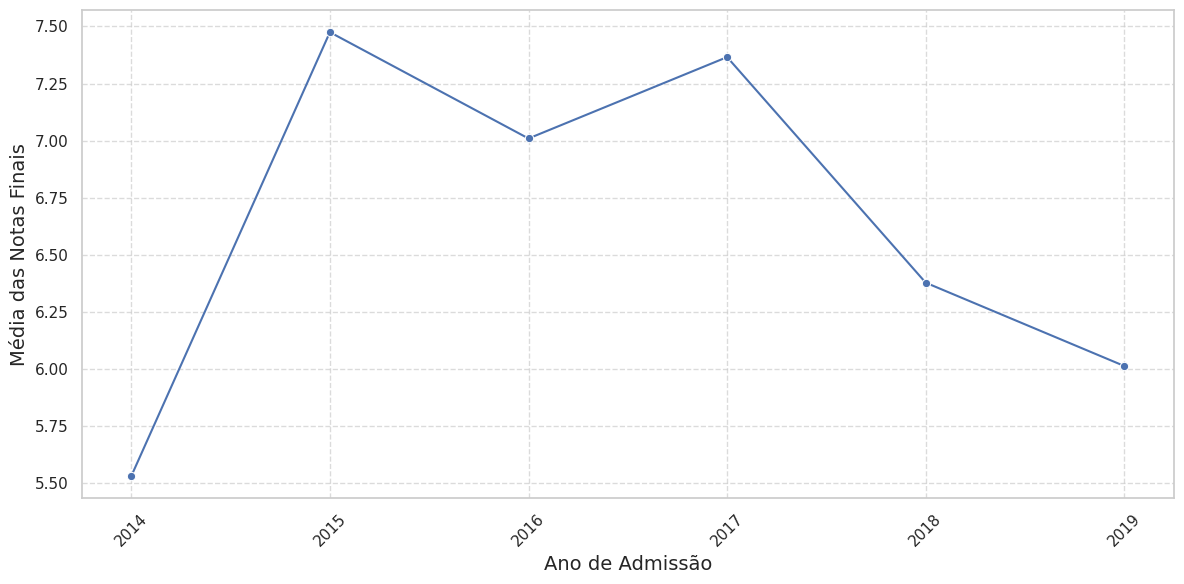

In [ ]:
# Observando as médias gerais a partir do ano de admissão
df_cotas = data[data['affirmativePolicy'].notna()]

df_grouped = df_cotas.groupby('admissionYear')['finalAverage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='admissionYear', y='finalAverage', marker='o')
plt.xlabel('Ano de Admissão', fontsize=14)
plt.ylabel('Média das Notas Finais', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

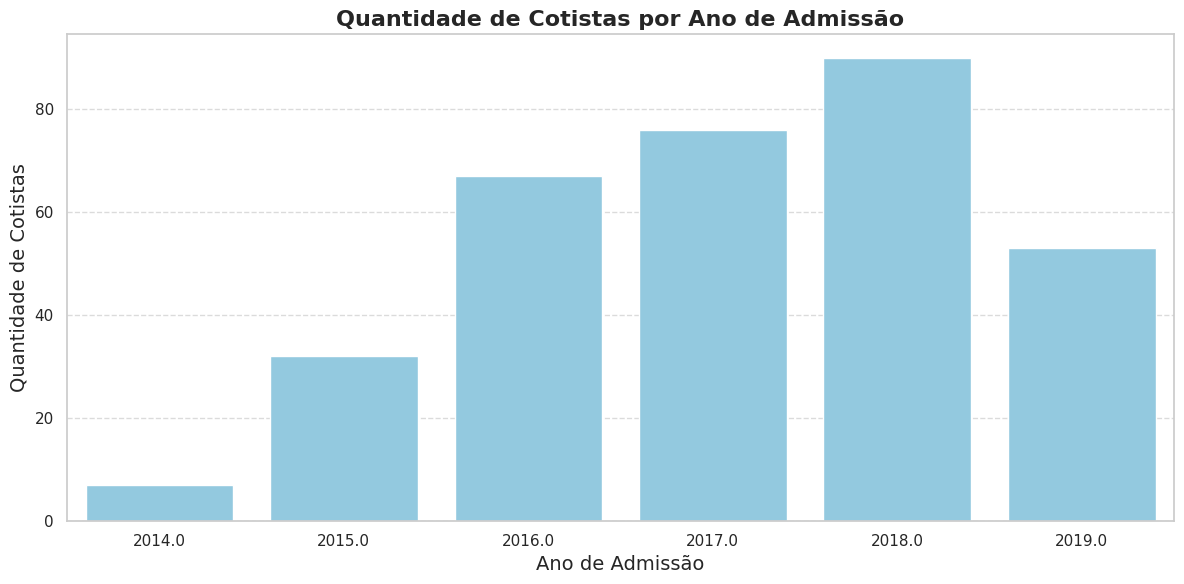

In [ ]:
# Observando a quantidade de cotistas por ano de admissão
df_count = df_cotas.groupby('admissionYear').size().reset_index(name='cotistas_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_count, x='admissionYear', y='cotistas_count', color='skyblue')  # Usar uma única cor

plt.title('Quantidade de Cotistas por Ano de Admissão', fontsize=16, weight='bold')
plt.xlabel('Ano de Admissão', fontsize=14)
plt.ylabel('Quantidade de Cotistas', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-22-d928720c23b2>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




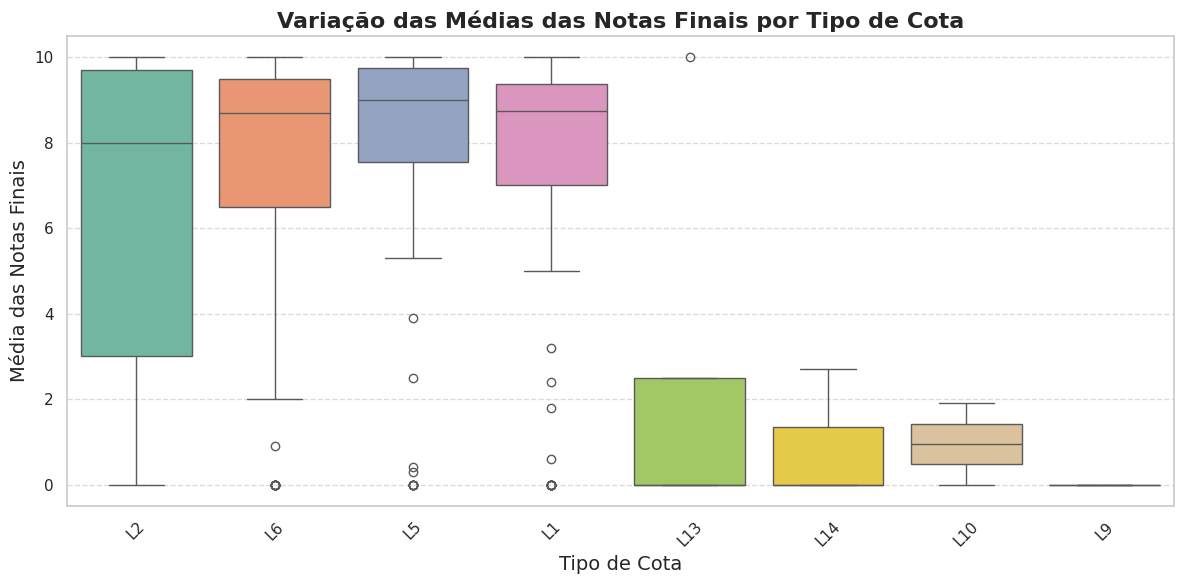

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cotas, x='affirmativePolicy', y='finalAverage', palette='Set2')
plt.title('Variação das Médias das Notas Finais por Tipo de Cota', fontsize=16, weight='bold')
plt.xlabel('Tipo de Cota', fontsize=14)
plt.ylabel('Média das Notas Finais', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-23-a402d54a80ff>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-a402d54a80ff>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




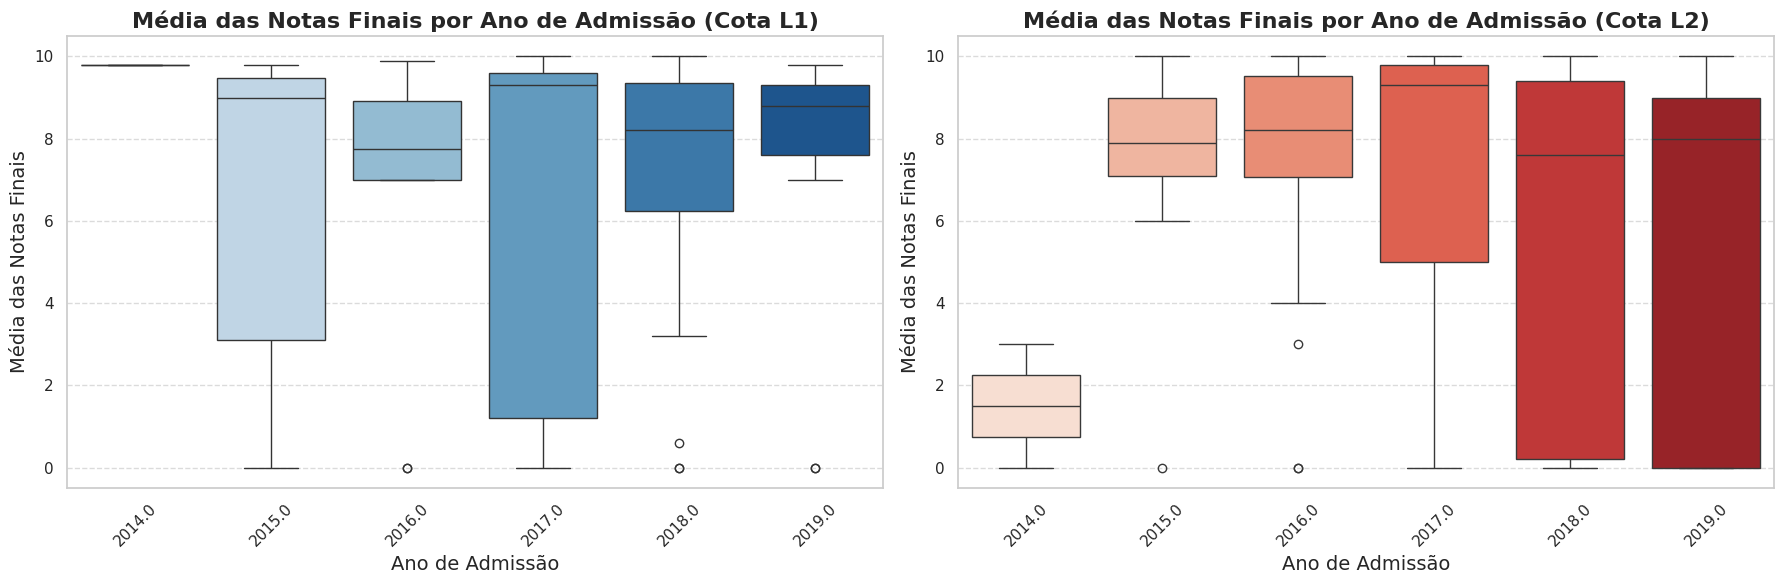

In [ ]:
df_cota_L1 = df_cotas[df_cotas['affirmativePolicy'] == 'L1']
df_cota_L2 = df_cotas[df_cotas['affirmativePolicy'] == 'L2']

plt.figure(figsize=(18, 6))

# Box plot para alunos com cota 'L1'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cota_L1, x='admissionYear', y='finalAverage', palette='Blues')
plt.title('Média das Notas Finais por Ano de Admissão (Cota L1)', fontsize=16, weight='bold')
plt.xlabel('Ano de Admissão', fontsize=14)
plt.ylabel('Média das Notas Finais', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot para alunos com cota 'L2'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cota_L2, x='admissionYear', y='finalAverage', palette='Reds')
plt.title('Média das Notas Finais por Ano de Admissão (Cota L2)', fontsize=16, weight='bold')
plt.xlabel('Ano de Admissão', fontsize=14)
plt.ylabel('Média das Notas Finais', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Gráfico Interativo

In [ ]:
import plotly.express as px

df_new = df_cotas.groupby(['admissionYear', 'affirmativePolicy'])['finalAverage'].mean().reset_index()

# Criar o gráfico de linhas
fig = px.line(df_new,
              x='admissionYear',
              y='finalAverage',
              color='affirmativePolicy',
              title='Evolução da Média das Notas por Ano de Admissão e Política Afirmativa',
              markers=True)

# Mostrar o gráfico
fig.show()
print(len(df_cotas[df_cotas["affirmativePolicy"] == "L13"]))

4


In [ ]:
df_new.iplot(kind='scatter', x='affirmativePolicy',y='finalAverage', mode='markers')

# Conclusão

Em um primeiro momento, de acordo com os dados do primeiro gráfico, podemos pensar que a média de notas dos cotistas diminui entre 2017 - 2019, talvez, até pela inserção de um novo currículo em 2017, entretanto, analisando o último gráfico de linhas, vemos que, na verdade, as médias, de uma forma geral, não se alteraram tanto, mas sim a média de cotas como L13, L10, L14 que possuem poucos registros e puxam a média para baixo.

Isso nos leva a concluir que para o curso de computação, com estudantes cursando o currículo de 2017, caso ele tenha ingressado utilizando de alguma cota, isso não fará uma diferença significativa em suas notas.